In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `C:\D Drive\Courses\Non Umich Courses\CMU\Optimal_Control_16_745\Lectures and Codes\Lecture 5\Project.toml`


In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
Q = Diagonal([0.5; 1])
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [4]:
function c(x)
    return x[1]^2 + 2*x[1] - x[2]
end
function ∂c(x)
    return [2*x[1]+2 -1]
end

∂c (generic function with 1 method)

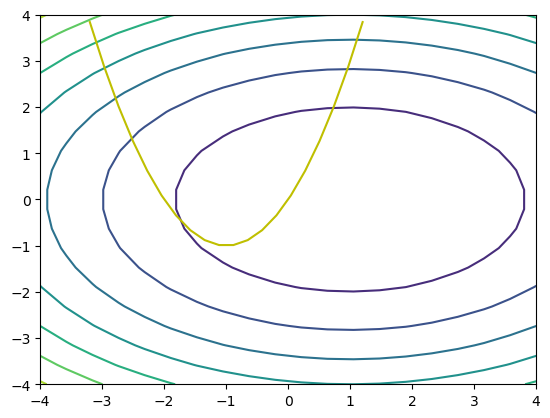

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002073D00>

In [5]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp),LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp,Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    contour(Xsamp,Ysamp,Zsamp)

    xc = LinRange(-3.2,1.2,Nsamp)
    plot(xc,xc.^2+2.0.*xc,"y")
end
plot_landscape()

In [6]:
function newton_step(x,λ)
    H = ∇2f(x) + ForwardDiff.jacobian(xn -> ∂c(xn)'*λ, x)
    C = ∂c(x)
    K = [H C'; C 0]
    Δz = K\[-∇f(x)-C'*λ; -c(x)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return Δx, Δλ
end

newton_step (generic function with 1 method)

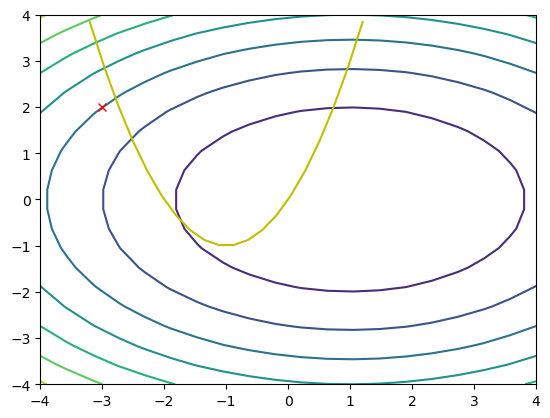

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000022C83D0>

In [7]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

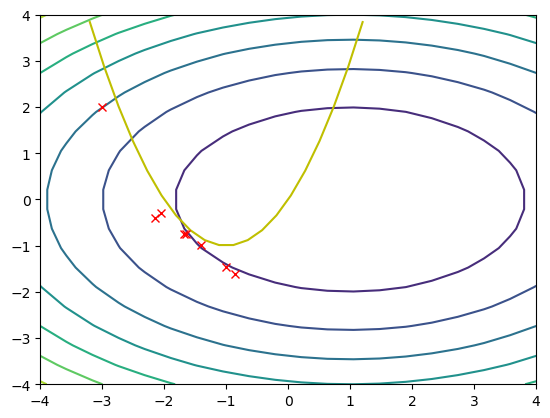

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000195A1C0>

In [15]:
Δx, Δλ = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xguess[:,end]+Δx]
λguess = [λguess λguess[end]+Δλ]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")

In [16]:
H = ∇2f(xguess[:,end]) + ForwardDiff.jacobian(xn -> ∂c(xn)'*λguess[end], xguess[:,end])
C = ∂c(xguess[:,end])
K = [H C'; C 0]
eigvals(K)

3-element Vector{Float64}:
 -2.7504046059655027
 -0.5914642540616377
  1.6230587398907093

In [17]:
function regularized_newton_step(x,λ)
    β = 1.0
    H = ∇2f(x) + ForwardDiff.jacobian(xn -> ∂c(xn)'*λ, x)
    C = ∂c(x)
    K = [H C'; C 0]
    e = eigvals(K)
    while !(sum(e .> 0) == length(x) && sum(e .< 0) == length(λ))
        K = K + Diagonal([β*ones(length(x)); -β*ones(length(λ))])
        e = eigvals(K)
    end
    Δz = K\[-∇f(x)-C'*λ; -c(x)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return Δx, Δλ
end

regularized_newton_step (generic function with 1 method)

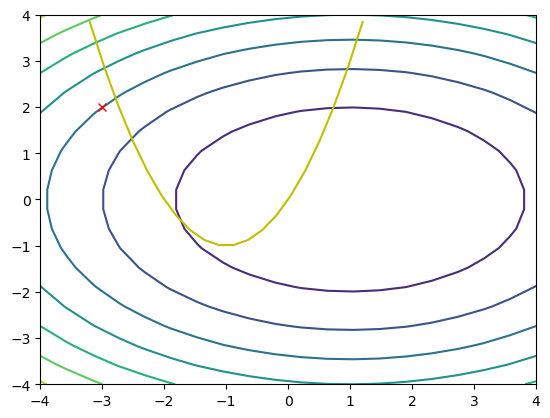

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000023A7DC0>

In [18]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

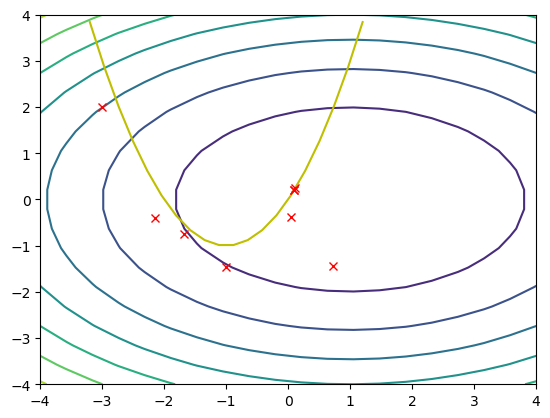

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063E3CC70>

In [26]:
Δx, Δλ = regularized_newton_step(xguess[:,end],λguess[end])
xguess = [xguess xguess[:,end]+Δx]
λguess = [λguess λguess[end]+Δλ]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")